In [1]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

import pysiaf
import miricoord.imager.mirim_tools as mt

In [2]:
siaf=pysiaf.Siaf('MIRI')
print('SIAF version: ',pysiaf.JWST_PRD_VERSION)
print('miricoord version: ',mt.version())

SIAF version:  PRDOPSSOC-039
miricoord version:  cdp7


## Convert 4QPM LFLAT ##

In [3]:
infile = '1043-MIRI-056-4QM-LFLAT-dedicatedscanpattern.txt' # input file in pixel offsets
outfile = '4QPM-LFLAT.txt' # output file in Ideal coordinates

In [4]:
# Read in desired offsets in pixels
data=ascii.read(infile)
number,dx,dy=data['Nr'].data,data['Xpix'].data,data['Ypix'].data
number=number+1 # PRD likes to be 1-indexed

In [5]:
# Define reference aperture that we'll use to construct the Ideal coordinates
aper='MIRIM_CORON1140'
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xi,yi=mt.v2v3toIdeal(v2,v3,aper)

SIAF version:  PRDOPSSOC-039


In [6]:
# Print results to a file
print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[0],xi[0],yi[0]),file=open(outfile,"w"))
for ii in range(1,len(xi)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi[ii],yi[ii]),file=open(outfile,"a"))

In [7]:
# Print results to screen
print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[0],xi[0],yi[0]))
for ii in range(1,len(xi)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi[ii],yi[ii]))

1   -0.000000       0.000000
2    1.539787      -1.659032
3    2.444246       2.990636
4   -2.861462       2.321947
5   -3.057211       7.193950
6   -8.569351       8.623290
7   -8.602654       2.758482
8   -9.959755      -3.427717
9   -8.656873      -8.607919
10  -6.319314      -4.641638
11   6.597329      -9.175415
12   8.589837      -8.625857
13   9.714696      -2.877593
14   9.307817       6.321733
15   8.654999       8.651504
16   5.672909       8.537166


Text(0, 0.5, 'YIdeal (arcsec)')

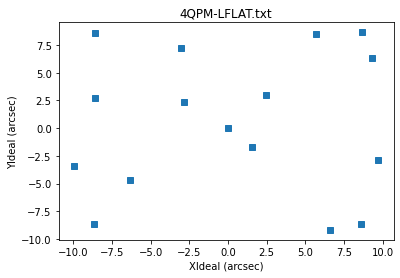

In [8]:
# Plot results
plt.plot(xi,yi,'s')
plt.title(outfile)
plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

### QA Check: Compare to pixel shifts in different 4QPM ###

In [9]:
# Convert back to pixel shifts
aper='MIRIM_CORON1065'
v2,v3=mt.Idealtov2v3(xi,yi,aper)
xout,yout=mt.v2v3toxy(v2,v3,'F770W')
dxout1065,dyout1065=xout-(siaf[aper].XDetRef-1),yout-(siaf[aper].YDetRef-1)

aper='MIRIM_CORON1140'
v2,v3=mt.Idealtov2v3(xi,yi,aper)
xout,yout=mt.v2v3toxy(v2,v3,'F770W')
dxout1140,dyout1140=xout-(siaf[aper].XDetRef-1),yout-(siaf[aper].YDetRef-1)

aper='MIRIM_CORON1550'
v2,v3=mt.Idealtov2v3(xi,yi,aper)
xout,yout=mt.v2v3toxy(v2,v3,'F770W')
dxout1550,dyout1550=xout-(siaf[aper].XDetRef-1),yout-(siaf[aper].YDetRef-1)

SIAF version:  PRDOPSSOC-039
MIRIM_CORON1065
SIAF version:  PRDOPSSOC-039
MIRIM_CORON1140
SIAF version:  PRDOPSSOC-039
MIRIM_CORON1550


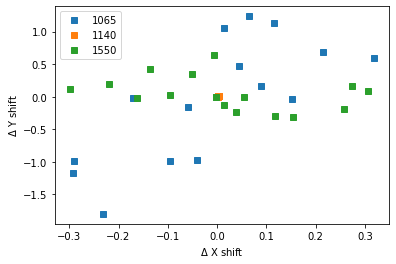

In [10]:
# Plot differences in pixel shifts from what was originally specified
plt.plot(dxout1065-dx,dyout1065-dy,'s',label='1065')
plt.plot(dxout1140-dx,dyout1140-dy,'s',label='1140')
plt.plot(dxout1550-dx,dyout1550-dy,'s',label='1550')
plt.xlabel(r'$\Delta$ X shift')
plt.ylabel(r'$\Delta$ Y shift')
plt.legend()

## Convert 4QPM PFLAT ##

In [11]:
infile = '1043-MIRI-056-4QM-PFLAT-dedicatedscanpattern.txt' # input file in pixel offsets
outfile = '4QPM-PFLAT.txt' # output file in Ideal coordinates

In [12]:
# Read in desired offsets in pixels
data=ascii.read(infile)
num,dx,dy=data['Nr'].data,data['Xpix'].data,data['Ypix'].data
num=num+1 # PRD likes to be 1-indexed

In [13]:
# Define reference aperture that we'll use to construct the Ideal coordinates
aper='MIRIM_CORON1140'
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xi,yi=mt.v2v3toIdeal(v2,v3,aper)

SIAF version:  PRDOPSSOC-039


In [14]:
# Print results to a file
print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[0],xi[0],yi[0]),file=open(outfile,"w"))
for ii in range(1,len(xi)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi[ii],yi[ii]),file=open(outfile,"a"))

In [15]:
# Print results to screen
print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[0],xi[0],yi[0]))
for ii in range(1,len(xi)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi[ii],yi[ii]))

1   -0.000000       0.000000
2    1.319705      -1.437831
3    2.110795       2.547329
4   -2.421229       1.990321
5   -2.621388       6.086816
6   -7.252303       7.297281
7   -7.279690       2.317630
8   -8.410447      -2.875857
9   -7.325307      -7.287464
10  -5.321856      -3.979629
11   5.606786      -7.739346
12   7.267004      -7.299184
13   8.279098      -2.434298
14   7.867615       5.322340
15   7.323931       7.318605
16   4.783271       7.204987


Text(0, 0.5, 'YIdeal (arcsec)')

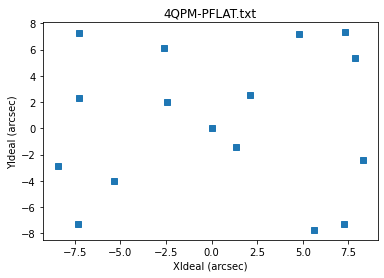

In [16]:
# Plot results
plt.plot(xi,yi,'s')
plt.title(outfile)
plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

## Convert Lyot LFLAT ##

In [17]:
infile = '1043-MIRI-056-LYOT-LFLAT-dedicatedscanpattern.txt' # input file in pixel offsets
outfile = 'LYOT-LFLAT.txt' # output file in Ideal coordinates

In [18]:
# Read in desired offsets in pixels
data=ascii.read(infile)
num,dx,dy=data['Nr'].data,data['Xpix'].data,data['Ypix'].data
num=num+1 # PRD likes to be 1-indexed

In [19]:
# Define reference aperture that we'll use to construct the Ideal coordinates
aper='MIRIM_CORONLYOT'
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xi,yi=mt.v2v3toIdeal(v2,v3,aper)

SIAF version:  PRDOPSSOC-039


In [20]:
# Print results to a file
print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[0],xi[0],yi[0]),file=open(outfile,"w"))
for ii in range(1,len(xi)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi[ii],yi[ii]),file=open(outfile,"a"))

In [21]:
# Print results to screen
print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[0],xi[0],yi[0]))
for ii in range(1,len(xi)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi[ii],yi[ii]))

1    0.000000      -0.000000
2    1.527488      -1.646378
3    2.430251       2.988223
4   -2.840251       2.299032
5   -4.558035       8.784708
6  -10.580645      10.615876
7  -10.182215       4.236012
8  -11.564585      -5.143308
9  -10.725485     -10.769191
10  -7.836590      -6.333512
11   8.288767     -10.784146
12  10.596551     -10.665586
13  11.392942      -4.364149
14  10.895695       7.979709
15  10.687321      10.729097
16   5.637318       8.508455


Text(0, 0.5, 'YIdeal (arcsec)')

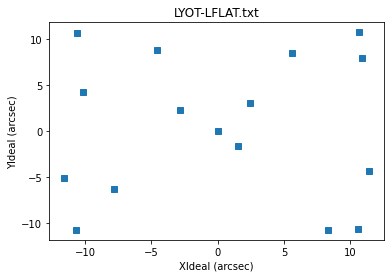

In [22]:
# Plot results
plt.plot(xi,yi,'s')
plt.title(outfile)
plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

## Convert Lyot PFLAT ##

In [23]:
infile = '1043-MIRI-056-LYOT-PFLAT-dedicatedscanpattern.txt' # input file in pixel offsets
outfile = 'LYOT-PFLAT.txt' # output file in Ideal coordinates

In [24]:
# Read in desired offsets in pixels
data=ascii.read(infile)
num,dx,dy=data['Nr'].data,data['Xpix'].data,data['Ypix'].data
num=num+1 # PRD likes to be 1-indexed

In [25]:
# Define reference aperture that we'll use to construct the Ideal coordinates
aper='MIRIM_CORONLYOT'
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xi,yi=mt.v2v3toIdeal(v2,v3,aper)

SIAF version:  PRDOPSSOC-039


In [26]:
# Print results to a file
print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[0],xi[0],yi[0]),file=open(outfile,"w"))
for ii in range(1,len(xi)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi[ii],yi[ii]),file=open(outfile,"a"))

In [27]:
# Print results to screen
print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[0],xi[0],yi[0]))
for ii in range(1,len(xi)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi[ii],yi[ii]))

1    0.000000      -0.000000
2    1.309164      -1.426867
3    2.098812       2.545848
4   -2.403191       1.970944
5   -3.907436       7.468234
6   -8.944905       8.977024
7   -8.649547       3.585389
8   -9.800915      -4.359321
9   -9.064565      -9.101744
10  -6.621280      -5.332646
11   6.978528      -9.130659
12   8.956354      -9.012704
13   9.639622      -3.707871
14   9.246740       6.762802
15   9.037210       9.072936
16   4.754176       7.183893


Text(0, 0.5, 'YIdeal (arcsec)')

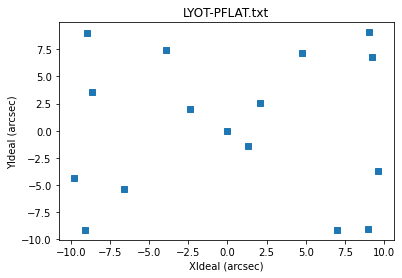

In [28]:
# Plot results
plt.plot(xi,yi,'s')
plt.title(outfile)
plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')